# Machine Learning avec Scipy

Scipy contient des modules tres puissants pour le machine learning, l'anayse de données, les time series, etc.
Ce notebook vous montre quelques unes des fonctions les plus utiles

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Interpolation
Interpoler un signal est parfois tres utile s'il vous manque des données dans un Dataset. Mais c'est une technique dangereuse, qui peut parfois transformer la réalité des choses !

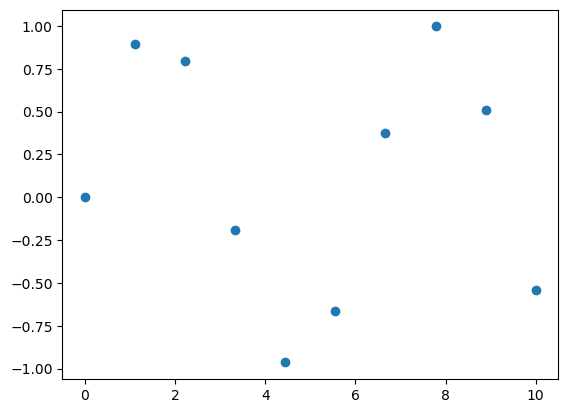

In [17]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [18]:
from scipy.interpolate import interp1d

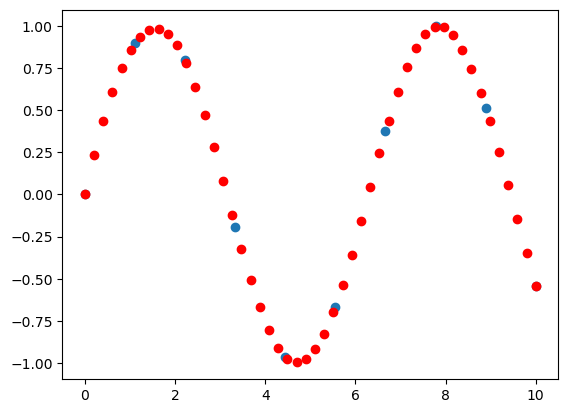

In [19]:
# création de la fonction interpolation f
f = interp1d(x, y, kind='cubic')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 50)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

# 2) Optimisation

On trouve beaucoup de fonctions dans le module **optimize**. Certaines permettent de faire des minimisations locales, ou globales, d'autres permette de développer des modeles statistiques avec la méthode des moindres carrés. On trouve également des fonctions pour faire de la programmation linéaire.

### curve_fit

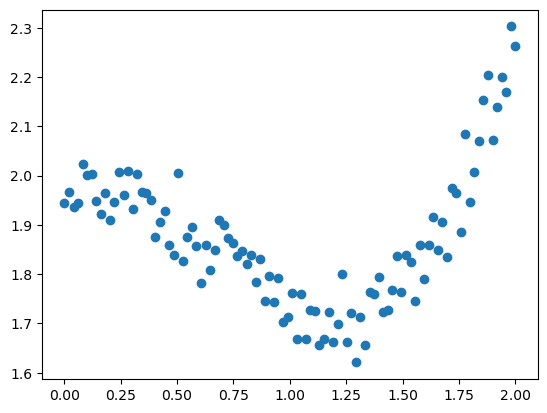

In [20]:
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [21]:
# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [22]:
from scipy import optimize

In [23]:
# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

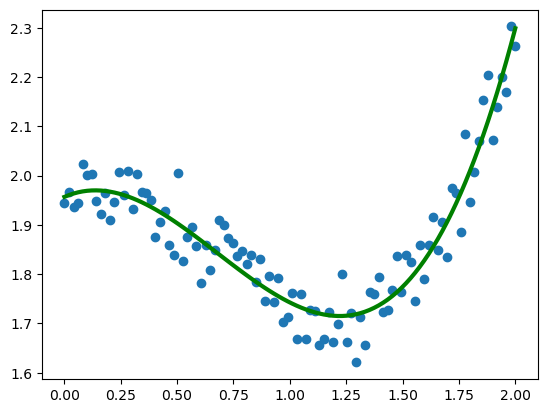

In [24]:
# Visualisation des résultats.
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## Minimisation 1D
la fonction **optimize.minimize** est utile pour trouver un minimum local dans une fonction a N dimensions

In [25]:
# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)

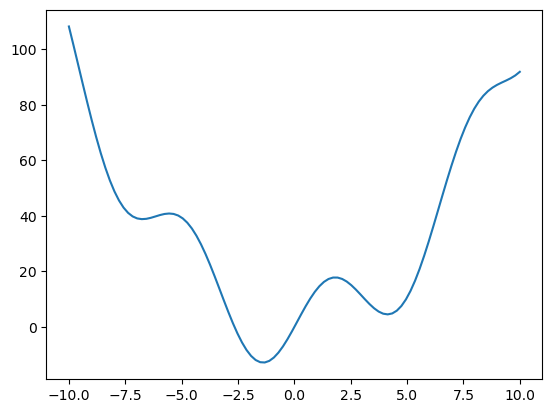

In [26]:
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [27]:
# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = optimize.minimize(f, x0=x0).x # résultat de la minimisation

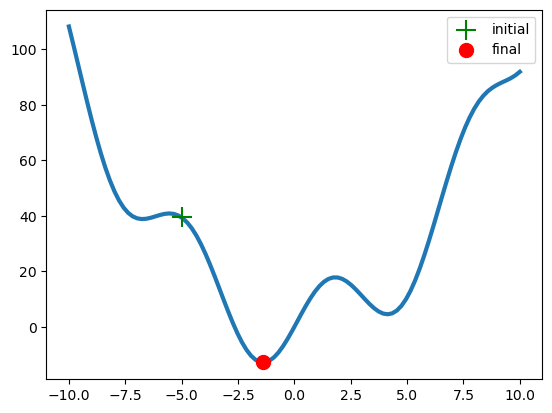

In [28]:
# Visualisation du résultat

plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

## Minimisation 2D

In [55]:
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

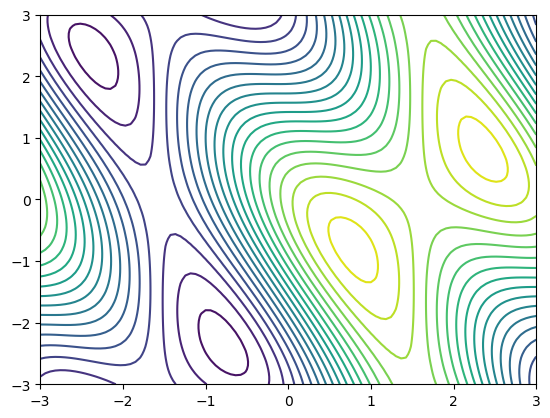

In [56]:
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

C:\Users\pasca\AppData\Local\Temp\ipykernel_35396\1158112078.py:8: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(f, x0=x0).x


[-0.78539918 -2.3561934 ]


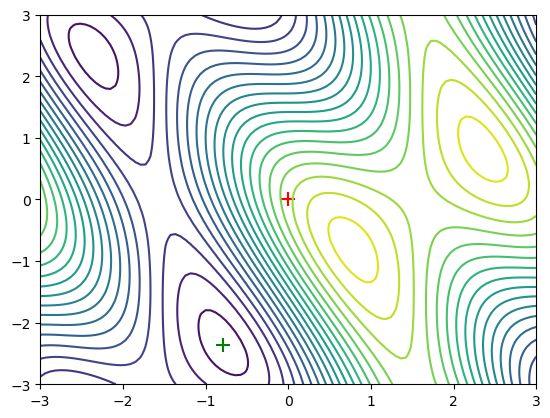

In [63]:
# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros((2, 1))
plt.scatter(x0[0], x0[1], c='r', marker='+', s=100)

result = optimize.minimize(f, x0=x0).x
plt.scatter(result[0], result[1], c='g', marker='+', s=100)

print(result)

# 3) Traitement du signal

Le module **scipy.signal** contient beaucoup de fonctions de convolution et de filtres pour faire du traitement du signal. La fonction **signal.detrend** est parfaite pour éliminer une tendance linéaire dans un signal. Utile pour beaucoup d'applications !

Le module **scipy.fftpack** contient des fonctions tres puissantes et simples d'utilisation pour effectuer des transformations de Fourier

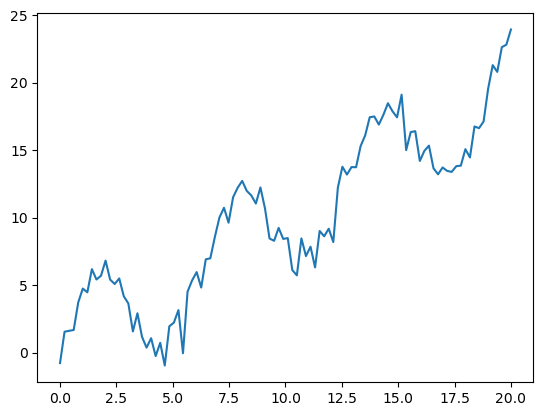

In [32]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

In [33]:
from scipy import signal

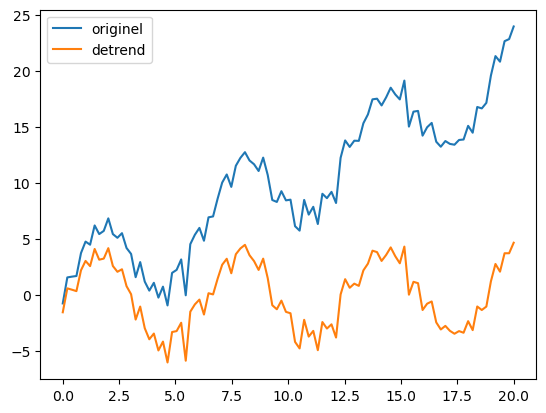

In [34]:
# Élimination de la tendance linéaire
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

## Transformation de Fourier (FFT)
La transformation de Fourier est une technique mathématique puissante et normalement complexe a mettre en oeuvre. Heureusement **scipy.fftpack** rend cette technique tres simple a implémenter

La transformation de Fourier permet d'analyser les **fréquences** qui composent un signal **périodique** (qui se répete avec le temps). Cette opération produit un graphique que l'on appelle **Spectre**.

Une fois le **Spectre** généré, il est possible de filtrer les bruits indésirables, ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres... les possibilités sont infinies.

Dans l'exemple ci-dessous, nous voyons comment filtrer un signal noyé dans du bruit.

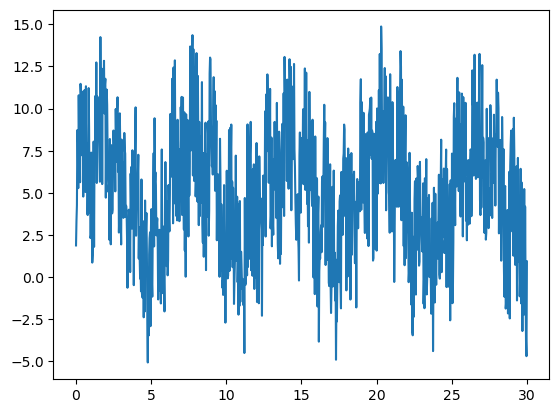

In [35]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [36]:
from scipy import fftpack

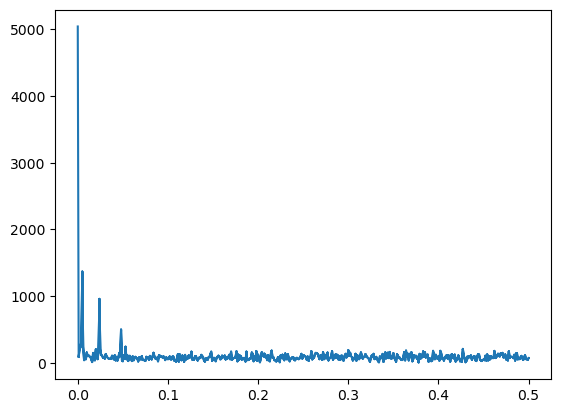

In [37]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

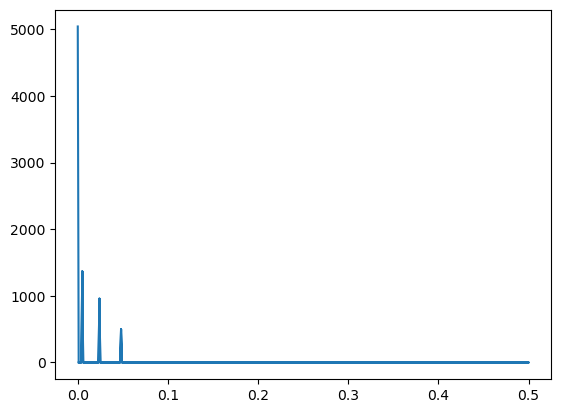

In [38]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [39]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

c:\Users\pasca\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


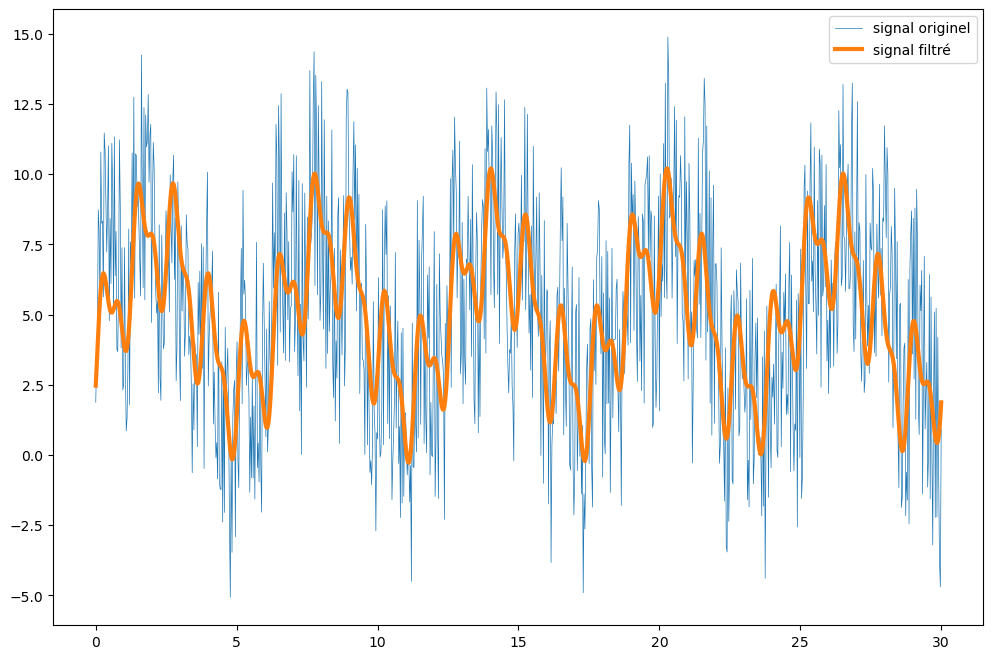

In [40]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

# 4) image processing

**scipy.ndimage** propose de nombreuses actions pour le traitement d'images: convolutions, filtres de Gauss, méthode de mesures, et morphologie.

La morphologie est une technique qui permet de transformer une matrice (et donc une image) par le déplacement d'une structure sur chaque pixel de l'image. Lorsqu'un pixel "blanc" est visité, la structure peut effectuer une opération:
- de dilation: imprime des pixels
- d'érosion : efface des pixels

Cette technique peut-etre utile pour nettoyer une image des artefacts qui peuvent la composer.

In [41]:
from scipy import ndimage

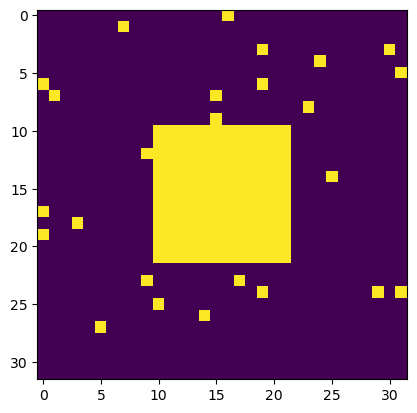

In [42]:
# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

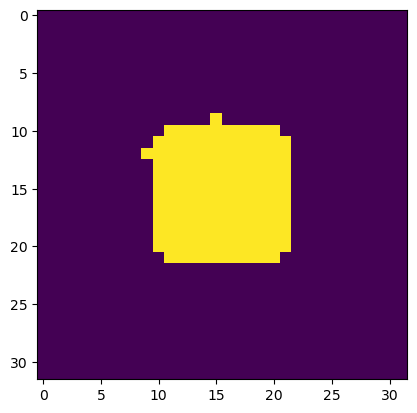

In [43]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

# 5) Application : Image processing (cas réel)

Vous pouvez télécharger cette image a l'adresse suivante:

In [44]:
# importer l'image avec pyplot
image = plt.imread('bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

FileNotFoundError: [Errno 2] No such file or directory: 'bacteria.png'

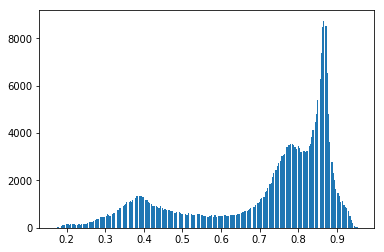

In [ ]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

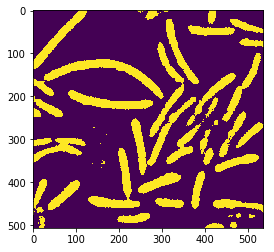

In [ ]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.imshow(image)

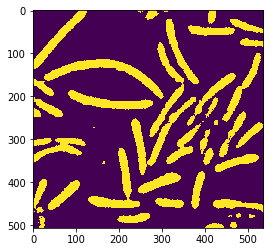

In [ ]:
# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

In [ ]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

il y a 53 groupes


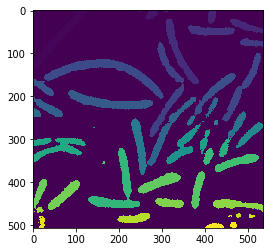

In [ ]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)

In [ ]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

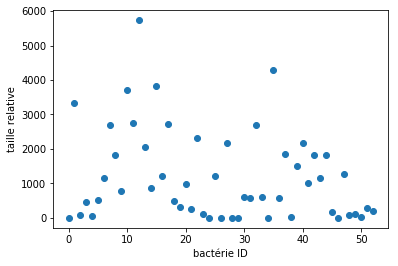

In [ ]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()